# **Week 0 : Introduction to Python**
In this assignment, we shall be providing a class template where you have to fill code in indicated areas. Let's get started!


<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png"
 style="float:right;width:50px;height:50px;">

# **Importing Libraries**
Feel free to import any additional libraries required

In [2]:
# Import all libraries here
import numpy as np
import time
import matplotlib.pyplot as plt 
# Setting the seed for reproducible results


# *Problem 1*
In this problem, we will explore the concept of vectorising processes. Hence, we will focus upon eliminating as many for loops as possible and compare performance with and without for loops using python libraries.
We will be computing
\begin{equation}
s = \sum_{i=1}^{N}w.v[i]
\end{equation}
for a given matrix 
\begin{equation}
M = [v(1)\text{  }v(2){}_{\cdots}\text{  }v(N)]
\end{equation}

In the function : \\
1. iterative_mult(w) : Iteratively multiply the row vector w with each of the columns of the matrix M (using a for loop), and return the addition of all results.
2. matrix_mult(w) : Multiply the row vector w with the matrix M and add the resulting columns using a function of the numpy library.
3. comparison(w) : Call the previous two functions here and measure the time taken in each of them using a python library. Store the times in variables time_iterative, time_matrix.

In [3]:
class Tester : 

  def __init__(self, M) :  
    self.M = M

  def iterative_mult(self,w) :

    ### INSERT CODE BELOW  ###
    sum=0
    for i in range(0, self.M.shape[1]):
      for j in range(0, w.size):
        sum=sum+w[0][j]*self.M[j][i]

    return sum
    ### INSERT CODE ABOVE ### 

  def matrix_mult(self, w) :

    ### INSERT CODE BELOW  ###
    m3=np.dot(w,self.M)

    return np.sum(m3)
    ### INSERT CODE ABOVE ###

  def comparison(self, w) :

    time_iterative = 0
    time_matrix = 0

    ### INSERT CODE BELOW  ###
    start = time.perf_counter()
    self.iterative_mult(w)
    end = time.perf_counter()
    time_iterative=end-start

    start = time.perf_counter()
    self.matrix_mult(w)
    end = time.perf_counter()
    time_matrix=end-start
        
    ### INSERT CODE ABOVE ###

    print(f'Time taken by iterative method : {time_iterative}\nTime taken by matrix method : {time_matrix}')

    return time_iterative, time_matrix

# tester_example=Tester(np.random.randn(2,3))
# w=np.random.randn(1,2)
# print(tester_example.comparison(w))

Now that we have created a tester class with some basic functionality of performance analysis, we will plot the time taken in both the methods of computing the required quantity. That is, given a row vector w, we want to compute :              

\begin{equation}
s = \sum_{i=1}^{N}w.v(i)
\end{equation}
For this purpose, we will use the matplotlib library in python. 

Time taken by iterative method : 0.00011905900001352165
Time taken by matrix method : 7.382999999094864e-05
Time taken by iterative method : 0.0010217089999855489
Time taken by matrix method : 7.476800001882111e-05
Time taken by iterative method : 0.007504643999993732
Time taken by matrix method : 0.002068102999999155
Time taken by iterative method : 0.12339401599999178
Time taken by matrix method : 0.0002166980000026797
Time taken by iterative method : 0.7095099659999846
Time taken by matrix method : 0.0008223769999915476


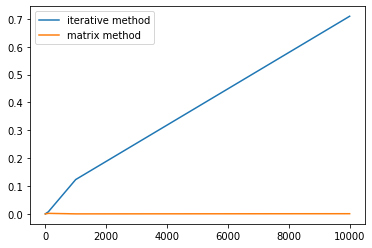

In [14]:
w = np.random.randn(1, 100)
results = []
max_pow = 5

for i in range(max_pow) : 

  '''
  1. Computing the times using Tester object defined above
  2. Append the times to the results array
  '''

  size = np.round(10**i)
  M = np.random.randn(100, size)
  tester = Tester(M)

  ### INSERT CODE BELOW ###
  times=tester.comparison(w)
  results.append([times[0],times[1]])
  ### INSERT CODE ABOVE ###

'''
Now, plot the (line) graph with the axes as : 
1. X-axis : The 2nd dimension of the matrix M
2. Y-axis : The times taken for the two processes

Additionally, you must use a legend in order to distinguish the graphs of the two processes.
'''

### INSERT CODE BELOW ###
result=np.array(results)
plt.plot([1,10,100,1000,10000], result[:,0])
plt.plot([1,10,100,1000,10000], result[:,1])
plt.legend(["iterative method", "matrix method"])

### INSERT CODE ABOVE ###

# **Observations**

Now that we have successfully plotted the graphs, you can comment on the differences in the two times of computation. Please write your observations in the text box provided below. Make sure to note down the following : \\
1. The approximate order of times obtained in the two processes (s/ms/$\mu$s/ns)
2. The method which results in lower computation times and by what factor
3. Some possible explanation for your observation (after some googling perhaps)

Insert observations here (double-click to edit the cell)
1. order of time for iterative method is seconds and that of matrix method is milli seconds
2. Matrix method results in lower computation time by a factor of 10^3
3. Order of iterative method is O(m*n) where W is order 1*n and M is of order n*m and the order of iteartive method is O(m). So, this explains the behavior observed in graph.

# *Problem 2*

In this assignment, you will be loading the famous [MNIST](http://yann.lecun.com/exdb/mnist/) dataset (a large dataset of hand-written images of numbers) from a *CSV* (comma separated values) file and performing various operations on them. 

Enjoy!





<img src="https://journaldev.nyc3.digitaloceanspaces.com/2020/10/mnist-dataset.png"
style="float:right;width:50px;height:50px;">

# **Loading Data**
Let's start by loading the csv file in the main repo. Figure out how to load a file onto Google Colab (or whichever notebook you're using). The data can be downloaded from [here](https://drive.google.com/file/d/1p-rZZRrdbK05uIwRvwnkinpJI5o2griD/view?usp=share_link)


In [76]:
# Insert code to load the csv file into the notebook
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import matplotlib.pyplot as plt
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# **Reading from a CSV File**
Now, let's read the values from the csv file! If you were to look into the file, you would see that each row has a long list of numbers, with the first column having numbers between **$0$ and $9$**, and the remaining columns having values from **$0$ to $255$** (make any sense?)

Feel free to store the data in any way you want, to set up future operations with those rows (you might want to read the following tasks before deciding how you would store this data, if it helps). 

Also, make use of the `csv` module to read csv files. There are many other ways, but this should do for this assignment at least.

In [114]:
# Insert code to store the contents of the file in a variable (or many variables, if you want)

link="https://drive.google.com/file/d/1p-rZZRrdbK05uIwRvwnkinpJI5o2griD/view?usp=share_link"
id="1p-rZZRrdbK05uIwRvwnkinpJI5o2griD"
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('mnist.csv')  
df = pd.read_csv('mnist.csv', header=None)


# **Organising Data**

If you didn't figure out what the first column was supposed to be, no worries : they are the labels of the corresponding images. The remaining $784$ columns ($28 \times 28$) correspond to the *gray-scale pixel values* of the $784$ pixels present in each image of a number.

For example, the first row in the dataset has a label of $7$, signifying that the next $784$ values correspond to an image of the number $7$. These $784$ pixels are ordered **row-wise**, so the first $28$ are for the first row, the next $28$ for the second, and so on.

Your tasks are the following : 

* Separate out the first column of values and store them separately as labels, you'll need them later

* Once you're done with that, reshape the rows (after the removal of the labels) into matrices with dimension $28 \times 28$ (If you've learnt *anything* from the first assignment, it should be to avoid using loops as much as possible, so think of, or search for, an inbuilt function that can reshape a matrix)

**Note** : Just like vectors have a *depth* of $1$ and matrices have a *depth* of $2$, `NumPy` supports objects that can have a *depth* greater than $2$. 

This generalisation can be thought of as a **Tensor**, and the *depth* is called the *rank* or the *order* of the Tensor. If you've stored your initial data as a matrix, try and reshape it into a tensor of rank $3$, for the second task.

In [126]:
# Write your code here
df1=df.to_numpy()
df2=df1.reshape(60000,785)
labels=df2[:,0]
pixels=df2[:,1:]
new_pixels=pixels.reshape(60000,28,28)


# **Plotting images**
Now that you have the data, in the form we want it in, go ahead and plot the first image! (Google it!)

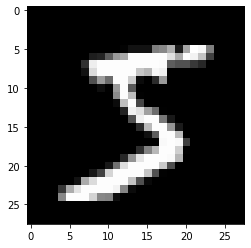

In [127]:
# Write your code here
import numpy as np
img = new_pixels[0,:,:]

plt.gray()
plt.imshow(img)



# **Grouping Images**

Let's try and group those images together, based on their labels. This is slightly (maybe more than slightly) harder to understand (just using inbuilt functions), but the objective is the same : To try and minimise the number of iterations performed outside of NumPy

Hint : You could also do this with $10$ iterations, which is the number of digits, and with $60000$ iterations, which is the number of images we have, so if you can't find any way without loops, try to find a way with $10$ iterations rather than $60000$

In [124]:
# Write your code here
label_0=labels==0
label_1=labels==1
label_2=labels==2
label_3=labels==3
label_4=labels==4
label_5=labels==5
label_6=labels==6
label_7=labels==7
label_8=labels==8
label_9=labels==9

label0=new_pixels[label_0,:,:]
label1=new_pixels[label_1,:,:]
label2=new_pixels[label_2,:,:]
label3=new_pixels[label_3,:,:]
label4=new_pixels[label_4,:,:]
label5=new_pixels[label_5,:,:]
label6=new_pixels[label_6,:,:]
label7=new_pixels[label_7,:,:]
label8=new_pixels[label_8,:,:]
label9=new_pixels[label_9,:,:]


# **Computing Mean Images**

Now that we have our data grouped, let's try to calculate the mean of the images corresponding to a particular label.

Don't forget to plot all of them!

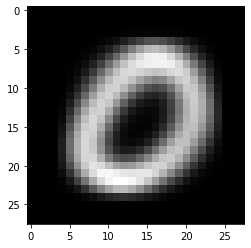

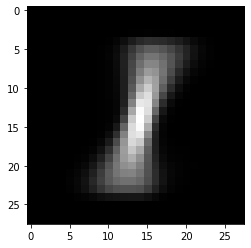

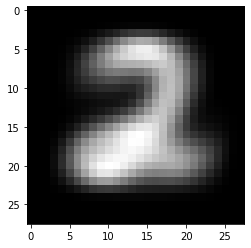

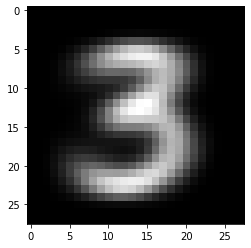

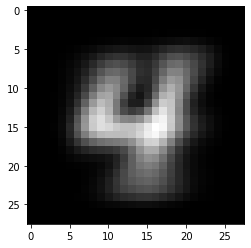

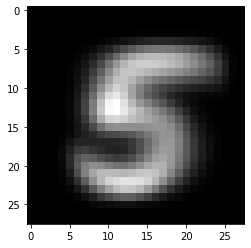

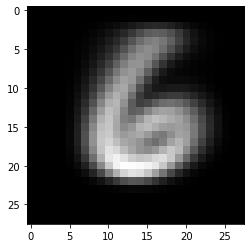

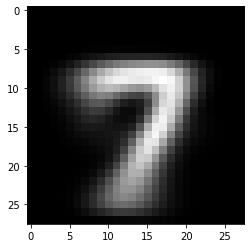

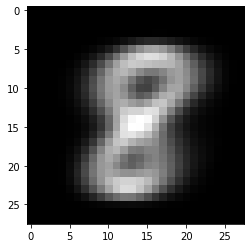

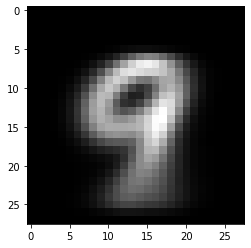

In [125]:
# Write your code here for an array of 10 images, each representing the mean image of a number from 0 to 9, in order. Also plot them!
import numpy as np

mean=np.zeros([28,28,10])
mean[:,:,0]=label0.mean(axis=0)
mean[:,:,1]=label1.mean(axis=0)
mean[:,:,2]=label2.mean(axis=0)
mean[:,:,3]=label3.mean(axis=0)
mean[:,:,4]=label4.mean(axis=0)
mean[:,:,5]=label5.mean(axis=0)
mean[:,:,6]=label6.mean(axis=0)
mean[:,:,7]=label7.mean(axis=0)
mean[:,:,8]=label8.mean(axis=0)
mean[:,:,9]=label9.mean(axis=0)

for i in range(0,10):
  plt.figure()
  plt.gray()
  plt.imshow(mean[:,:,i])


# **Submission**

Please upload the edited version of this notebook in the github classroom, with your file labelled as \<roll_number\>_week0.ipynb